<a href="https://colab.research.google.com/github/Batovs/Poker/blob/main/Perfis_Vil%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

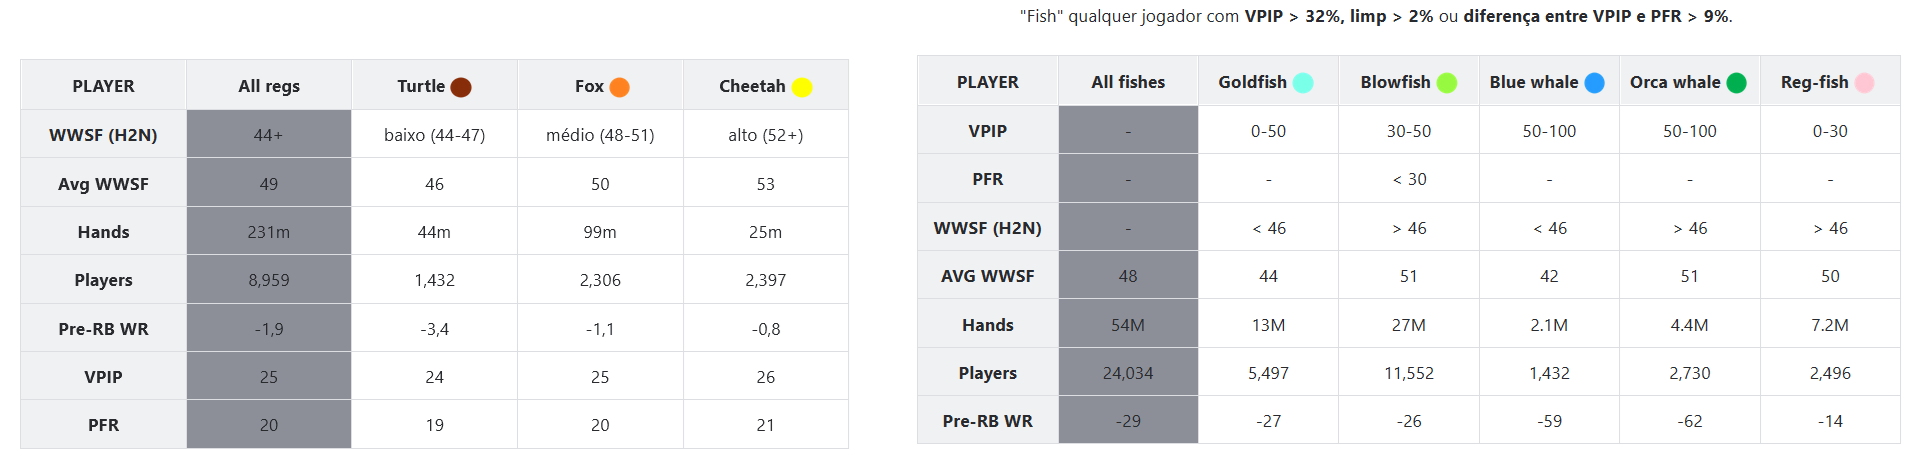

In [87]:
#bibliotecas
import pandas as pd
import numpy as np

In [88]:
maos = 50
flops = 50

#importar um csv e colocar uma tabela pandas

df = pd.read_csv('ReportExport.csv')

In [89]:
# prompt: se na coluna 'Reg ou Fish' for 'fish' e o 'vpip' for maior que 50 mudar na coluna 'Reg ou Fish' para 'Baleia'

#importar um csv e colocar uma tabela pandas

df = pd.read_csv('ReportExport.csv')
#Tratamento de dados
# Função para converter strings com vírgula para milhar em inteiros
def convert_hands(value):
  if isinstance(value, str):
    return int(value.replace(',', ''))
  return value

# Aplicar a função à coluna "Hands" do DataFrame
df['Hands'] = df['Hands'].apply(convert_hands)
df['Saw Flop'] = df['Saw Flop'].apply(convert_hands)

df = df.replace('-', 0)

#definir o tipo de dados
df = df.astype({"Hands": int, "Saw Flop": int, "Open Limp": float, "VPIP": float, "PFR": float, "WWSF": float})
# Reg ou Fish
# Crie a coluna 'Reg ou Fish' com base nas condições
df['Reg ou Fish'] = np.where(
    (df['VPIP'] > 32.5) | (df['Open Limp'] > 2.5) | (df['VPIP'] - df['PFR'] > 9.5), 'Fish', 'Reg'
)

# Aplicar a regra para "Reg ou Fish" e "sem amostra"
df.loc[df['Hands'] < maos, 'Reg ou Fish'] = 'sem amostra'

# Perfis de Reg ou Fish
def define_perfil(row):
    reg_ou_fish = row['Reg ou Fish']
    vpip = row['VPIP']
    pfr = row['PFR']
    wwsf = row['WWSF']
    saw_flop = row['Saw Flop'] # Accessing Saw Flop column

    if saw_flop < flops:
        return "sem amostra" # Return "sem amostra" if Saw Flop < flop

    if reg_ou_fish == 'Fish':
        if 0 <= vpip <= 50 and wwsf < 43.5:
            return 'Goldfish'
        elif 30 <= vpip <= 50 and pfr < 30 and wwsf > 43.5:
            return 'Blowfish'
        elif 50 < vpip <= 100 and wwsf < 43.5:
            return 'Blue Whale'
        elif 50 < vpip <= 100 and wwsf > 43.5:
            return 'Orca Whale'
        elif 0 <= vpip <= 30 and wwsf > 43.5:
            return 'Reg-fish'
    elif reg_ou_fish == 'Reg':
        if wwsf < 46.5:
            return 'Turtle'
        elif 46.5 <= wwsf <= 49.5:
            return 'Fox'
        elif wwsf > 49.5:
            return 'Cheetah'
    elif reg_ou_fish == 'sem amostra':
        return 'sem amostra'
    return 'Undefined'  # Handle cases that don't match any criteria

df['Perfil'] = df.apply(define_perfil, axis=1)

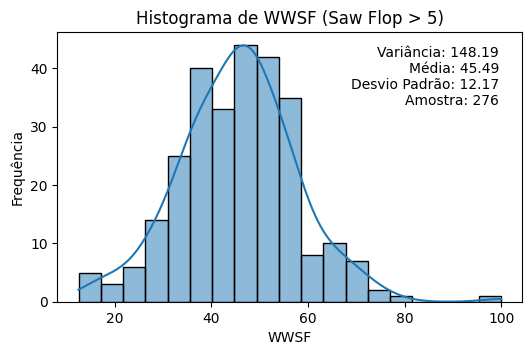

número de mãos variância amostral
 23.0
número de mãos variância máxima p(1-p) = 0.25
 385.0


In [90]:
# prompt: fazer um histograma com seaborn da coluna 'WWSF'  com 'Saw Flop' > 10
# e calculando variância, média e desvio padrão e número da amostra

import matplotlib.pyplot as plt
import seaborn as sns

# Filtra o DataFrame para 'Saw Flop' > 10
df_filtered = df[df['Saw Flop'] > 5]

# Plota o histograma
plt.figure(figsize=(6, 3.5))
sns.histplot(df_filtered['WWSF'], kde=True)

# Calcula estatísticas descritivas
variance_wwsf = df_filtered['WWSF'].var()
mean_wwsf = df_filtered['WWSF'].mean()
std_dev_wwsf = df_filtered['WWSF'].std()
sample_size_wwsf = len(df_filtered['WWSF'])

# Adiciona as estatísticas descritivas no gráfico
plt.text(0.95, 0.95,
         f'Variância: {variance_wwsf:.2f}\nMédia: {mean_wwsf:.2f}\nDesvio Padrão: {std_dev_wwsf:.2f}\nAmostra: {sample_size_wwsf}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

plt.title('Histograma de WWSF (Saw Flop > 5)')
plt.xlabel('WWSF')
plt.ylabel('Frequência')
plt.show()

Z = 1.96
E = 5
N = ((Z/E)**2)*variance_wwsf
print('número de mãos variância amostral\n',np.ceil(N))

Ep = 0.05
Np = ((Z/Ep)**2)*0.25
print('número de mãos variância máxima p(1-p) = 0.25\n',np.ceil(Np))

In [91]:
Z = 1.96
E = 1
N = ((Z/E)**2)*variance_wwsf
print('número de mãos variância amostral\n',np.ceil(N))

Ep = 0.05
Np = ((Z/Ep)**2)*0.25
print('número de mãos variância máxima p(1-p) = 0.25\n',np.ceil(Np))

número de mãos variância amostral
 570.0
número de mãos variância máxima p(1-p) = 0.25
 385.0


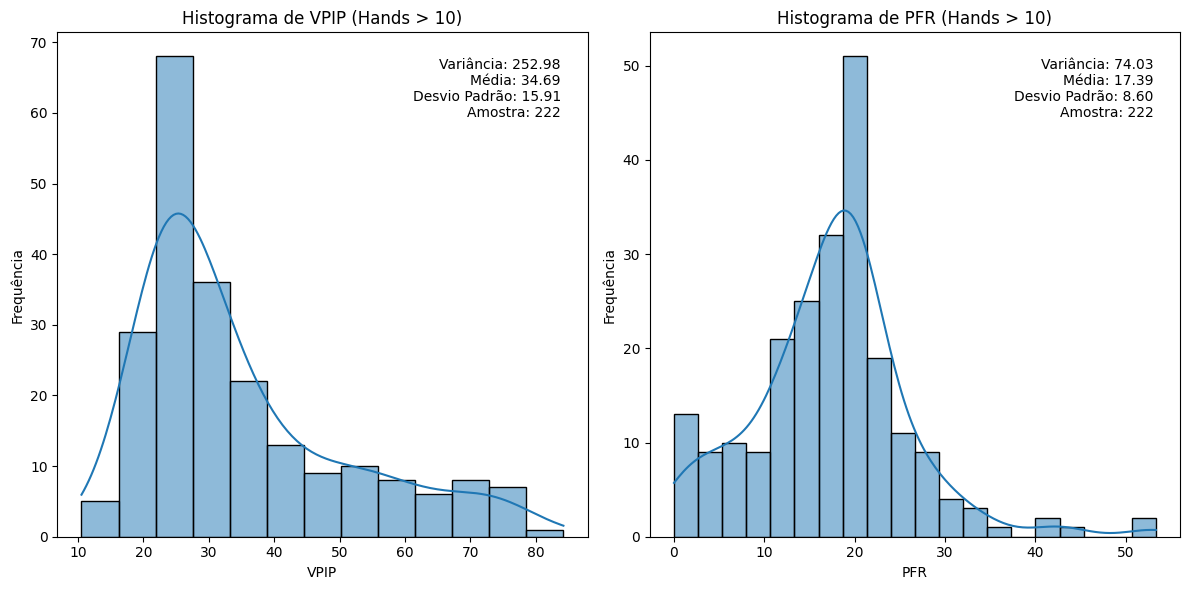

número de mãos variância amostral vpip erro de  4 
 61.0
número de mãos variância amostral pfr erro de  5 
 12.0


In [92]:
# prompt: cria um histograma para 'VPIP' e outro para 'PFR' filtrar para 'Hands' > 10
# calcular amostra, média, variância e desvio padrão, colocar essas informações dentro do gráfico
# e colocar os dois gráficos na mesma imagem

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Filtra o DataFrame para 'Hands' > 10
df_filtered = df[df['Hands'] > 50]

# Cria a figura e os eixos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plota o histograma para VPIP
sns.histplot(df_filtered['VPIP'], kde=True, ax=axes[0])
# Calcula estatísticas descritivas para VPIP
variance_vpip = df_filtered['VPIP'].var()
mean_vpip = df_filtered['VPIP'].mean()
std_dev_vpip = df_filtered['VPIP'].std()
sample_size_vpip = len(df_filtered['VPIP'])
# Adiciona as estatísticas descritivas no gráfico
axes[0].text(0.95, 0.95,
             f'Variância: {variance_vpip:.2f}\nMédia: {mean_vpip:.2f}\nDesvio Padrão: {std_dev_vpip:.2f}\nAmostra: {sample_size_vpip}',
             horizontalalignment='right', verticalalignment='top', transform=axes[0].transAxes)
axes[0].set_title('Histograma de VPIP (Hands > 10)')
axes[0].set_xlabel('VPIP')
axes[0].set_ylabel('Frequência')


# Plota o histograma para PFR
sns.histplot(df_filtered['PFR'], kde=True, ax=axes[1])
# Calcula estatísticas descritivas para PFR
variance_pfr = df_filtered['PFR'].var()
mean_pfr = df_filtered['PFR'].mean()
std_dev_pfr = df_filtered['PFR'].std()
sample_size_pfr = len(df_filtered['PFR'])
# Adiciona as estatísticas descritivas no gráfico
axes[1].text(0.95, 0.95,
             f'Variância: {variance_pfr:.2f}\nMédia: {mean_pfr:.2f}\nDesvio Padrão: {std_dev_pfr:.2f}\nAmostra: {sample_size_pfr}',
             horizontalalignment='right', verticalalignment='top', transform=axes[1].transAxes)
axes[1].set_title('Histograma de PFR (Hands > 10)')
axes[1].set_xlabel('PFR')
axes[1].set_ylabel('Frequência')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Z = 1.96
E_vpip = 4
N_vpip = ((Z/E_vpip)**2)*variance_vpip
print('número de mãos variância amostral vpip erro de ', E_vpip,'\n',np.ceil(N_vpip))

Z = 1.96
E_pfr = 5
N_pfr = ((Z/E_pfr)**2)*variance_pfr
print('número de mãos variância amostral pfr erro de ',E_pfr,'\n',np.ceil(N_pfr))


In [93]:
Z = 1.96
E_vpip = 4
N_vpip = ((Z/E_vpip)**2)*variance_vpip
print('número de mãos variância amostral vpip erro de ', E_vpip,'\n',np.ceil(N_vpip))

Z = 1.96
E_pfr = 5
N_pfr = (Z**2/E_pfr**2)*variance_pfr
print('número de mãos variância amostral pfr erro de ',E_pfr,'\n',np.ceil(N_pfr))

número de mãos variância amostral vpip erro de  4 
 61.0
número de mãos variância amostral pfr erro de  5 
 12.0


In [94]:
# prompt: construa um intervalo de confiança para cada valor de 'WWSF' e coloque o resultado em uma nova coluna
# sendo a média o valor de 'WWSF'
# a variância amostral de todos igual a 'variance'
# e o sample size igual ao valor de 'Saw Flop'

import scipy.stats as st

# ... (Your existing code) ...

# Calculate confidence intervals
def confidence_interval(mean, variance, sample_size):
    alpha = 0.05  # 95% confidence interval
    z_critical = st.norm.ppf(1 - alpha / 2)
    margin_of_error = z_critical * (variance**0.5) / (sample_size**0.5)
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound


df['WWSF_CI'] = df.apply(lambda row: confidence_interval(row['WWSF'], variance_wwsf, row['Saw Flop']), axis=1)


In [95]:
# prompt: Criar duas colunas 'Perfil_LB' e 'Perfil_UB'
# e usando os valores de 'VPIP', 'PFR' e 'WWSF_CI'
# determinar se é 'Cheetah', 'Fox', 'Turtle', se na coluna 'Reg ou Fish' for 'Reg'
# e 'Fish', 'Goldfish', 'Blowfish', 'Blue Whale', 'Orca Whale' ou 'Reg-fish' se na coluna 'Reg ou Fish' for Fish
# se o valor em 'Reg ou Fish' for 'sem amostra' colocar 'sem amostra' em 'Perfil_LB' e 'Perfil_UB'
# fazer primeiro em lower_bound e depois em upper_bound

import pandas as pd
import numpy as np

# ... (Your existing code) ...

def define_perfil_lb(row):
    reg_ou_fish = row['Reg ou Fish']
    vpip = row['VPIP']
    pfr = row['PFR']
    wwsf_ci = row['WWSF_CI']

    if reg_ou_fish == 'sem amostra':
        return 'sem amostra'

    if reg_ou_fish == 'Fish':
      if 0 <= vpip <= 50 and wwsf_ci[0] < 43.5:
          return 'Goldfish'
      elif 30 <= vpip <= 50 and pfr < 30 and wwsf_ci[0] > 43.5:
          return 'Blowfish'
      elif 50 < vpip <= 100 and wwsf_ci[0] < 43.5:
          return 'Blue Whale'
      elif 50 < vpip <= 100 and wwsf_ci[0] > 43.5:
          return 'Orca Whale'
      elif 0 <= vpip <= 30 and wwsf_ci[0] > 43.5:
          return 'Reg-fish'
    elif reg_ou_fish == 'Reg':
        if wwsf_ci[0] < 46.5:
            return 'Turtle'
        elif 46.5 <= wwsf_ci[0] <= 49.5:
            return 'Fox'
        elif wwsf_ci[0] > 49.5:
            return 'Cheetah'
    return 'Undefined'

def define_perfil_ub(row):
    reg_ou_fish = row['Reg ou Fish']
    vpip = row['VPIP']
    pfr = row['PFR']
    wwsf_ci = row['WWSF_CI']

    if reg_ou_fish == 'sem amostra':
        return 'sem amostra'

    if reg_ou_fish == 'Fish':
      if 0 <= vpip <= 50 and wwsf_ci[1] < 43.5:
          return 'Goldfish'
      elif 30 <= vpip <= 50 and pfr < 30 and wwsf_ci[1] > 43.5:
          return 'Blowfish'
      elif 50 < vpip <= 100 and wwsf_ci[1] < 43.5:
          return 'Blue Whale'
      elif 50 < vpip <= 100 and wwsf_ci[1] > 43.5:
          return 'Orca Whale'
      elif 0 <= vpip <= 30 and wwsf_ci[1] > 43.5:
          return 'Reg-fish'
    elif reg_ou_fish == 'Reg':
        if wwsf_ci[1] < 46.5:
            return 'Turtle'
        elif 46.5 <= wwsf_ci[1] <= 49.5:
            return 'Fox'
        elif wwsf_ci[1] > 49.5:
            return 'Cheetah'
    return 'Undefined'


df['Perfil_LB'] = df.apply(define_perfil_lb, axis=1)
df['Perfil_UB'] = df.apply(define_perfil_ub, axis=1)


In [97]:
# prompt: se 'Perfil_LB' e 'Perfil_UB' forem iguais então colocar o valor de 'Perfil_LB' em 'Perfil.
# se forem diferentes, então
# se em 'Perfil_LB' e 'Perfil_UB' for respectivamente 'Turtle' e 'Fox' colocar em 'Perfil' o valor 'Turtle-Fox'
# se for 'Fox' e 'Cheetah' colocar em 'Perfil' o valor 'Fox-Cheetah'
# se for 'Turtle' e 'Cheetah' colocar em 'Perfil' 'Undefined'
# se for 'Goldfish' e 'Reg-fish' colocar 'Gold-Regfish'
# se for 'Goldfish' e 'Blowfish' colocar 'Fish'
# se for 'Blue Whale' e 'Orca Whale' colocar 'Baleia'

def define_perfil_final(row):
    perfil_lb = row['Perfil_LB']
    perfil_ub = row['Perfil_UB']

    if perfil_lb == perfil_ub:
        return perfil_lb
    elif perfil_lb == 'Turtle' and perfil_ub == 'Fox':
        return 'Turtle-Fox'
    elif perfil_lb == 'Fox' and perfil_ub == 'Cheetah':
        return 'Fox-Cheetah'
    elif perfil_lb == 'Turtle' and perfil_ub == 'Cheetah':
        return 'Reg Indefinido'
    elif perfil_lb == 'Goldfish' and perfil_ub == 'Reg-fish':
        return 'Gold-Regfish'
    elif perfil_lb == 'Goldfish' and perfil_ub == 'Blowfish':
        return 'Fish Indefinido'
    elif perfil_lb == 'Blue Whale' and perfil_ub == 'Orca Whale':
        return 'Baleia Indefinido'
    else:
        return 'Undefined' # Default if no other condition is met

df['Perfil'] = df.apply(define_perfil_final, axis=1)


In [98]:
# Nova regra para mudar 'Reg ou Fish' para 'Baleia'
df.loc[(df['Reg ou Fish'] == 'Fish') & (df['VPIP'] > 50), 'Reg ou Fish'] = 'Baleia'

# Move columns 'Reg ou Fish' and 'Perfil'
cols = list(df.columns)
cols.insert(1, cols.pop(cols.index('Perfil')))
cols.insert(2, cols.pop(cols.index('Reg ou Fish')))
df = df[cols]


# Drop the specified columns
df_export = df.drop(columns=['WWSF_CI', 'Perfil_LB', 'Perfil_UB'])

# Export to CSV
df_export.to_csv('perfis_total.csv', index=False)

# Criar DataFrame df_regfish com as linhas que não possuem "sem amostra"
df_regfish = df_export[df_export['Reg ou Fish'] != 'sem amostra']
df_perfis = df_export[df_export['Perfil'] != 'sem amostra']

# Exportar df_regfish para 'perfis_regfish.csv'
df_regfish.to_csv('perfis_regfish.csv', index=False)
df_perfis.to_csv('perfis.csv', index=False)

In [ ]:
# prompt: zipar os csv gerados e fazer o dowload

import zipfile
from google.colab import files

def zip_and_download_csvs(filenames):
  """Zips multiple CSV files and initiates a download."""

  with zipfile.ZipFile('csvs.zip', 'w') as zipf:
    for filename in filenames:
      zipf.write(filename)

  files.download('csvs.zip')

# Call the function with your CSV filenames
zip_and_download_csvs(['perfis_total.csv', 'perfis_regfish.csv', 'perfis.csv'])
